# Introduction to Python tools

Module: Python modules are libraries of code you can use in your program but you let it know using the import statements.

### Installation of modules

In anaconda distribution, many modules are installed by defaults. Pip is most widely used to install
modules in Python. A good overview on how to use pip can be found here  https://www.youtube.com/watch?v=jnpC_Ib_lbc. 
For details, visit https://packaging.python.org/tutorials/installing-packages/.

### How to use modules

In [67]:
#use case 1
import math

In [68]:
math.pi

3.141592653589793

In [69]:
#use case 2
from math import pi

In [70]:
pi

3.141592653589793

In [71]:
#use case 3
from math import pi as PI

In [72]:
PI

3.141592653589793

In [73]:
#use case 4: import everything from a module
from math import*

In [74]:
sqrt(10)

3.1622776601683795

In [75]:
math.sqrt (10)

3.1622776601683795

In [76]:
import random

In [77]:
# randomly select an item from a list
random.choice([2,5,8,10])

8

In [78]:
random.choice(["CAN","AUS","USA","UK"])

'CAN'

# Matplotlib

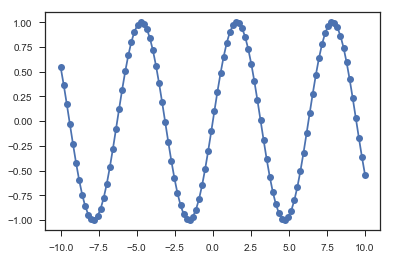

In [79]:
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="o")
plt.show()

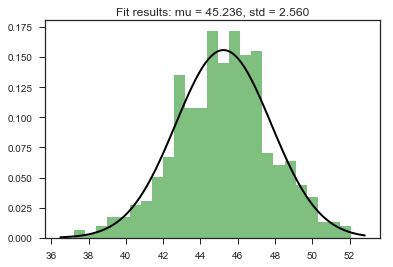

In [80]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data from a normal distribution
data = norm.rvs(45.0, 2.5, size=500)

# Plot the histogram of the data
plt.hist(data, bins=25, normed=True, alpha=0.5, color='g')

# Fit the data to a normal distribution
mu, std = norm.fit(data)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.3f, std = %.3f" % (mu, std)
plt.title(title)
plt.show()

# Pandas

The Pandas module is a high performance, highly efficient, and high level data analysis library. Pandas is 
also compatible with many of the other data analysis libraries, like Scikit-Learn for machine learning, 
Matplotlib for plotting, NumPy, since it uses NumPy,and more. Pandas is compatible with xlsx, xls, 
text files, csv, hdf files, xml, html, and more with its incredibly powerful IO.

See this tutorial for a detailed overview: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

In [81]:
import pandas as pd
help(pd)

Help on package pandas:

NAME
    pandas

FILE
    c:\users\rezac\anaconda2\lib\site-packages\pandas\__init__.py

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data
      - Size mutability: columns can be inserted and deleted fro

### Data structures

In [82]:
# Series
a_series= pd.Series([1,3,5,np.nan,6,8])
print(a_series)
type(a_series)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


pandas.core.series.Series

In [83]:
# Constructing DataFrame from a dictionary.
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Gender':['M','F','M','F'],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }
a_dataFrame = pd.DataFrame(data)
print(a_dataFrame)
print(type(a_dataFrame))
print(type(a_dataFrame.Age)) #Each column is a series

   Age Gender  Location   Name
0   24      M  New York   John
1   13      F     Paris   Anna
2   53      M    Berlin  Peter
3   33      F    London  Linda
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Viewing Data

In [84]:
a_dataFrame.head(3) # shows only first 3 rows

,Age,Gender,Location,Name
0,24,M,New York,John
1,13,F,Paris,Anna
2,53,M,Berlin,Peter


In [85]:
a_dataFrame.tail(3) # shows the last 3 rows

,Age,Gender,Location,Name
1,13,F,Paris,Anna
2,53,M,Berlin,Peter
3,33,F,London,Linda


In [86]:
a_dataFrame.columns

Index([u'Age', u'Gender', u'Location', u'Name'], dtype='object')

In [87]:
a_dataFrame.describe()

,Age
count,4.000000
mean,30.750000
std,16.938615
min,13.000000
25%,21.250000
50%,28.500000
75%,38.000000
max,53.000000


In [88]:
a_dataFrame.describe(include='all')

,Age,Gender,Location,Name
count,4.000000,4,4,4
unique,NaN,2,4,4
top,NaN,F,London,John
freq,NaN,2,1,1
mean,30.750000,NaN,NaN,NaN
std,16.938615,NaN,NaN,NaN
min,13.000000,NaN,NaN,NaN
25%,21.250000,NaN,NaN,NaN
50%,28.500000,NaN,NaN,NaN
75%,38.000000,NaN,NaN,NaN


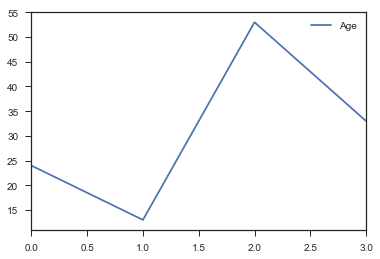

In [89]:
a_dataFrame.plot() # x axis is index if not specified
plt.show()

### Selecting data

In [90]:
a_dataFrame.loc[:2,['Age','Name']] #select by label

,Age,Name
0,24,John
1,13,Anna
2,53,Peter


In [91]:
a_dataFrame.iloc[:3,[0,2]] #select by position

,Age,Location
0,24,New York
1,13,Paris
2,53,Berlin


In [92]:
#Iterating over a dataframe
for index, row in a_dataFrame.iterrows():
    print(row['Name'], index)

('John', 0)
('Anna', 1)
('Peter', 2)
('Linda', 3)


In [93]:
# Conditional selection
a_dataFrame[a_dataFrame['Age']>20]

,Age,Gender,Location,Name
0,24,M,New York,John
2,53,M,Berlin,Peter
3,33,F,London,Linda


### Adding or dropping a Column

In [94]:
# Let's check whether age is over 50 or not and make a new column out of it
# we can assing a list to the new column like this

a_dataFrame['young']=np.where(a_dataFrame['Age']<=30, 'yes', 'no')
a_dataFrame

,Age,Gender,Location,Name,young
0,24,M,New York,John,yes
1,13,F,Paris,Anna,yes
2,53,M,Berlin,Peter,no
3,33,F,London,Linda,no


In [95]:
#another way we can do it by looping through each row and check the age by combining apply and lambda method
a_dataFrame['young_loop']= a_dataFrame.apply(lambda row: 1 if row.Age<=30 else 0, axis=1)
a_dataFrame

,Age,Gender,Location,Name,young,young_loop
0,24,M,New York,John,yes,1
1,13,F,Paris,Anna,yes,1
2,53,M,Berlin,Peter,no,0
3,33,F,London,Linda,no,0


In [96]:
a_dataFrame=a_dataFrame.drop(['young_loop'],axis=1)
a_dataFrame

,Age,Gender,Location,Name,young
0,24,M,New York,John,yes
1,13,F,Paris,Anna,yes
2,53,M,Berlin,Peter,no
3,33,F,London,Linda,no


### Processing missing data

In [97]:
# Let's add some missing data
a_dataFrame['AddMissing']=[1,5,np.nan,6]
a_dataFrame

,Age,Gender,Location,Name,young,AddMissing
0,24,M,New York,John,yes,1.0
1,13,F,Paris,Anna,yes,5.0
2,53,M,Berlin,Peter,no,NaN
3,33,F,London,Linda,no,6.0


In [98]:
# Drop any missing data
a_dataFrame.dropna(how='any')

,Age,Gender,Location,Name,young,AddMissing
0,24,M,New York,John,yes,1.0
1,13,F,Paris,Anna,yes,5.0
3,33,F,London,Linda,no,6.0


In [99]:
# fill missing data
a_dataFrame.fillna(value=9999)

,Age,Gender,Location,Name,young,AddMissing
0,24,M,New York,John,yes,1.0
1,13,F,Paris,Anna,yes,5.0
2,53,M,Berlin,Peter,no,9999.0
3,33,F,London,Linda,no,6.0


### Concatenation and Merging

In [100]:
# DataFrame 2
data2 = {'Name': ["Mickel", "Anna", "Drew", "Linda"],
        'Gender':['M','F','M','F'],
        'Location' : ["California", "Paris", "Chicago", "London"],
        'Age' : [28, 13, 40, 33]
       }
dataFrame2=pd.DataFrame(data2)
dataFrame2

,Age,Gender,Location,Name
0,28,M,California,Mickel
1,13,F,Paris,Anna
2,40,M,Chicago,Drew
3,33,F,London,Linda


In [101]:
# Concate in pandas

concat_dataFrame=pd.concat([a_dataFrame,dataFrame2])
concat_dataFrame

,AddMissing,Age,Gender,Location,Name,young
0,1.0,24,M,New York,John,yes
1,5.0,13,F,Paris,Anna,yes
2,NaN,53,M,Berlin,Peter,no
3,6.0,33,F,London,Linda,no
0,NaN,28,M,California,Mickel,NaN
1,NaN,13,F,Paris,Anna,NaN
2,NaN,40,M,Chicago,Drew,NaN
3,NaN,33,F,London,Linda,NaN


In [102]:
# Merge in pandas

merge_dataFrame=pd.merge(a_dataFrame,dataFrame2,how='inner',on=['Name'])
merge_dataFrame

,Age_x,Gender_x,Location_x,Name,young,AddMissing,Age_y,Gender_y,Location_y
0,13,F,Paris,Anna,yes,5.0,13,F,Paris
1,33,F,London,Linda,no,6.0,33,F,London


### Conversion between datatypes

In [103]:
a_dataFrame.dtypes

Age             int64
Gender         object
Location       object
Name           object
young          object
AddMissing    float64
dtype: object

In [104]:
a_dataFrame['Age']=a_dataFrame['Age'].astype(float)
a_dataFrame

,Age,Gender,Location,Name,young,AddMissing
0,24.0,M,New York,John,yes,1.0
1,13.0,F,Paris,Anna,yes,5.0
2,53.0,M,Berlin,Peter,no,NaN
3,33.0,F,London,Linda,no,6.0


### Reading and writing to a file

In [107]:
#Writing data to a file
a_dataFrame.to_csv(r'data.csv')

In [109]:
#Reading data from a file
from_file_df=pd.read_csv(r'data.csv')

from_file_df

,Unnamed: 0,Age,Gender,Location,Name,young,AddMissing
0,0,24.0,M,New York,John,yes,1.0
1,1,13.0,F,Paris,Anna,yes,5.0
2,2,53.0,M,Berlin,Peter,no,NaN
3,3,33.0,F,London,Linda,no,6.0


# plotting different data
## Used traffic data ( November,03, 2017 to November,09,2017) 

## Scatter Plot

In [110]:
import pandas as pd

infile='traffic_data.csv'  
df=pd.read_csv(infile,parse_dates=['measurement_start'],usecols=['zone_id','measurement_start','speed','volume','occupancy'])

df=df[df['zone_id']==10031]

df=df.sort_values('measurement_start')

df.drop('zone_id',1,inplace=True)

print(df.head())

    measurement_start      speed  volume  occupancy
0 2017-11-03 00:00:00  59.446599    52.0   2.261905
1 2017-11-03 00:05:00  62.216667    39.0   1.400000
2 2017-11-03 00:10:00  54.527551    56.0   2.400000
3 2017-11-03 00:15:00  56.950000    42.0   1.377778
4 2017-11-03 00:20:00  48.584444    46.0   1.955556


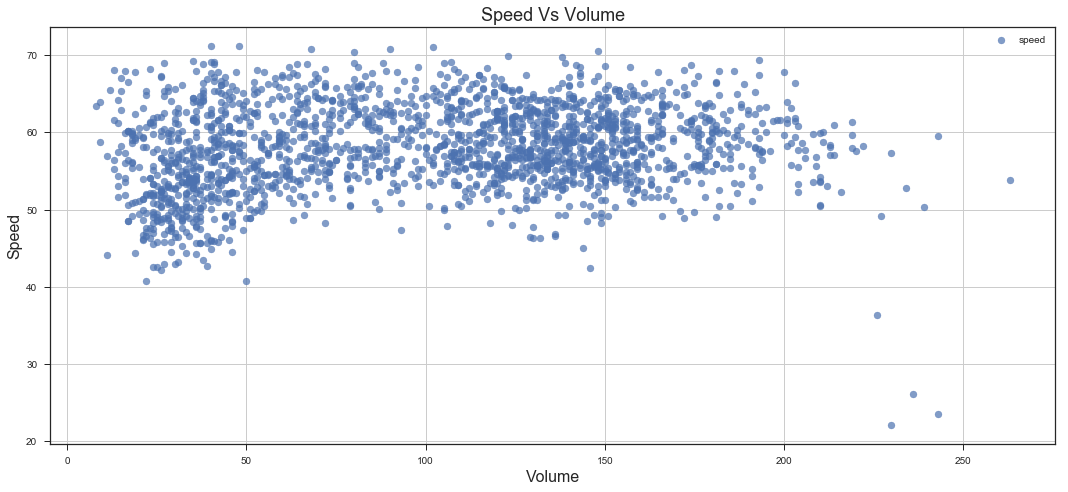

In [111]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax1=plt.subplots(figsize=(15,7))
ax1.scatter(df['volume'], df['speed'],alpha=0.7)
ax1.set_xlabel('Volume',size=16)
ax1.set_ylabel('Speed',size=16)
ax1.set_title('Speed Vs Volume',size=18)

plt.grid(True)
ax1.legend()
plt.tight_layout()

plt.show()

## Scatter Matrix

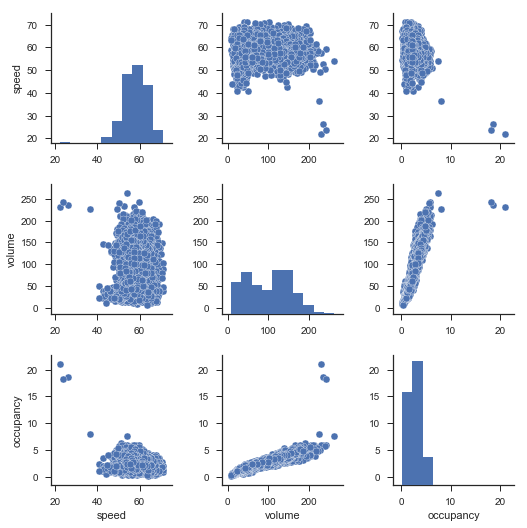

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

sns.pairplot(df)

plt.show()

## Line plot 

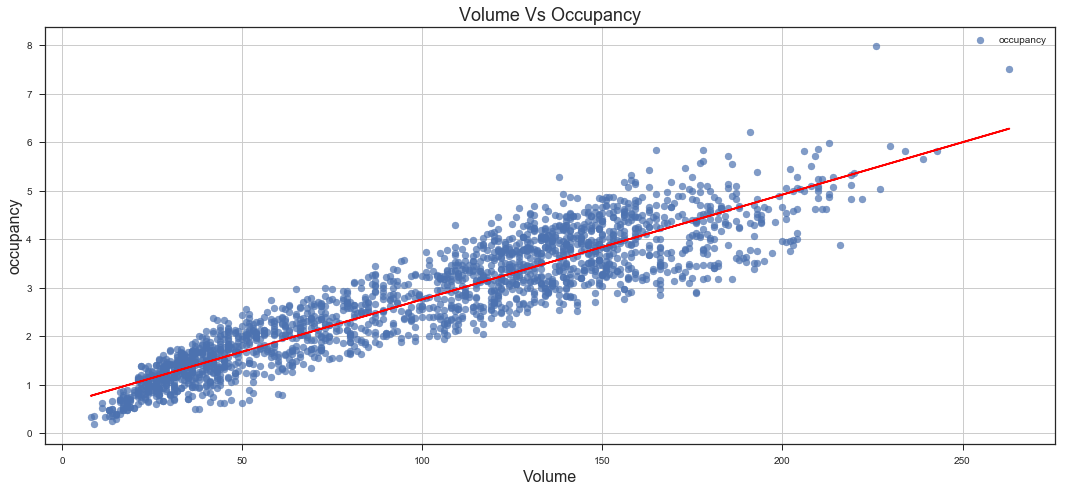

In [113]:
import matplotlib.pyplot as plt

df2=df[df['occupancy']<10]

fit = np.polyfit(df2['volume'],df2['occupancy'],1)

fit_fn1 = np.poly1d(fit)

Y=fit_fn1(df2['volume'])

fig,ax2=plt.subplots(figsize=(15,7))
ax2.scatter(df2['volume'], df2['occupancy'],alpha=0.7)
ax2.plot(df2['volume'],Y,'-r')
ax2.set_xlabel('Volume',size=16)
ax2.set_ylabel('occupancy',size=16)
ax2.set_title('Volume Vs Occupancy',size=18)
plt.grid()
ax2.legend()
plt.tight_layout()
plt.show()

## Histogram Plot

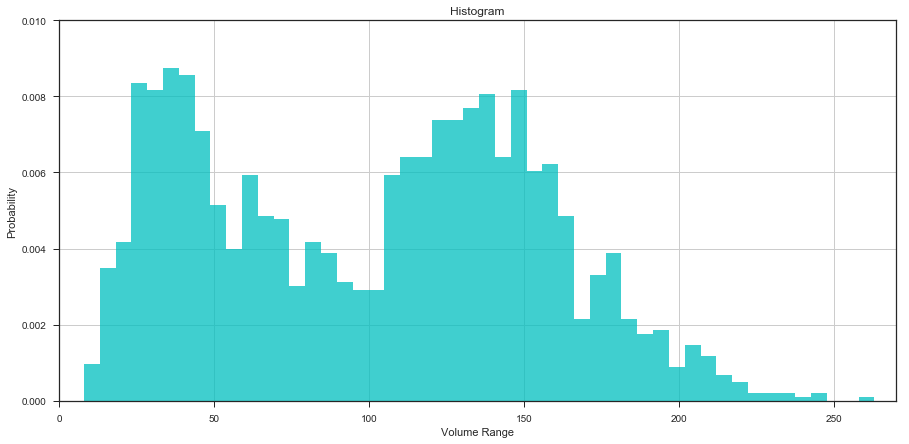

In [114]:
import numpy as np
import matplotlib.pyplot as plt


# the histogram of the data

fig, ax3=plt.subplots(figsize=(15,7))

n, bins, patches = ax3.hist(df['volume'],50,density=True, facecolor='c', alpha=0.75)

ax3.set_xlabel('Volume Range')
ax3.set_ylabel('Probability')
ax3.set_title('Histogram')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax3.axis([0, 270, 0, 0.01])
ax3.grid(True)
plt.show()



In [115]:
bins

array([   8. ,   13.1,   18.2,   23.3,   28.4,   33.5,   38.6,   43.7,
         48.8,   53.9,   59. ,   64.1,   69.2,   74.3,   79.4,   84.5,
         89.6,   94.7,   99.8,  104.9,  110. ,  115.1,  120.2,  125.3,
        130.4,  135.5,  140.6,  145.7,  150.8,  155.9,  161. ,  166.1,
        171.2,  176.3,  181.4,  186.5,  191.6,  196.7,  201.8,  206.9,
        212. ,  217.1,  222.2,  227.3,  232.4,  237.5,  242.6,  247.7,
        252.8,  257.9,  263. ])

## Bar PLots

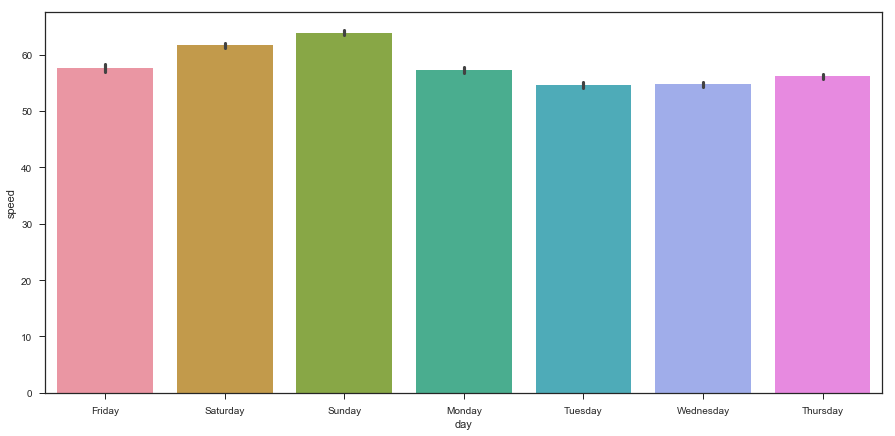

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax_1=plt.subplots(figsize=(15,7))

df['day']=df['measurement_start'].dt.weekday_name
sns.set(style="whitegrid")
ax_1 = sns.barplot(x="day", y="speed", data=df)
plt.show()

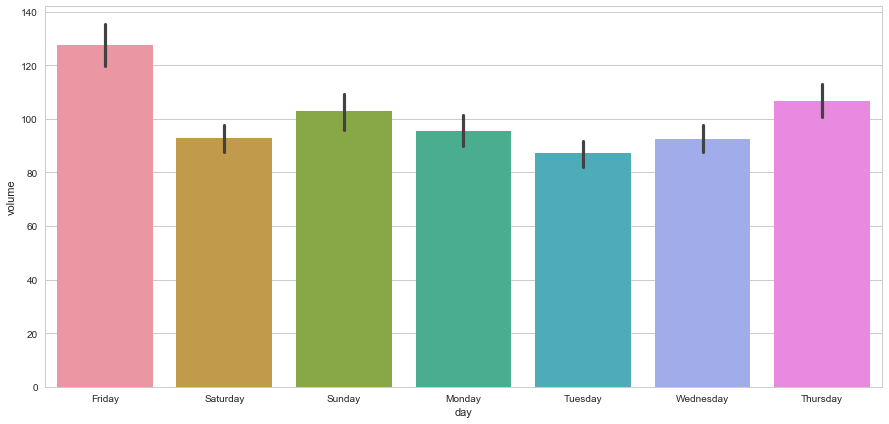

In [117]:
fig, ax_2=plt.subplots(figsize=(15,7))
ax_2 = sns.barplot(x="day", y="volume", data=df)
plt.show()

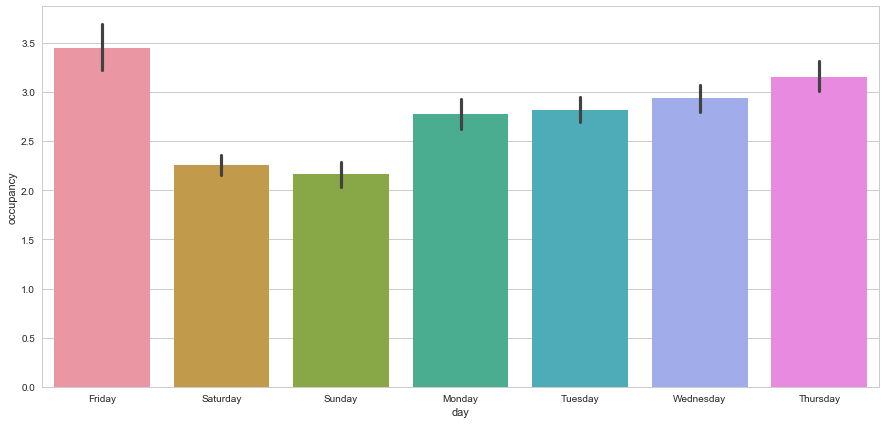

In [118]:
fig, ax_3=plt.subplots(figsize=(15,7))
ax_3 = sns.barplot(x="day", y="occupancy", data=df)
plt.show()

## Box Plot

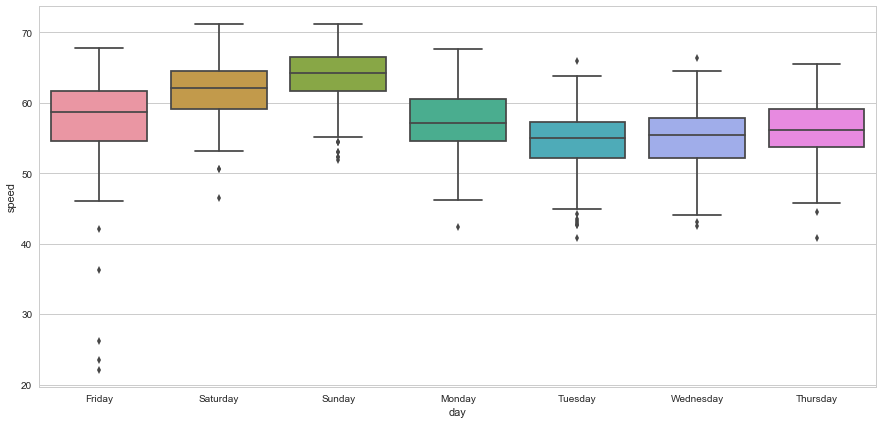

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax_4=plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
ax_4 = sns.boxplot(x="day", y="speed", data=df)
plt.show()

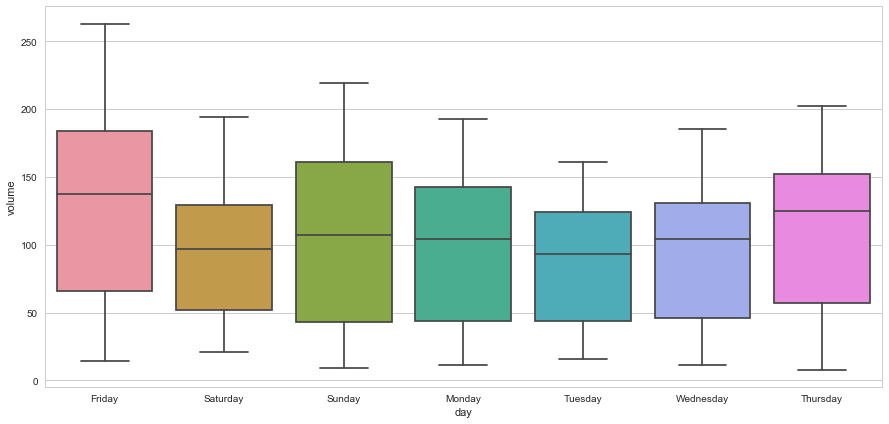

In [120]:
fig, ax_5=plt.subplots(figsize=(15,7))
ax_5 = sns.boxplot(x="day", y="volume", data=df)
plt.show()

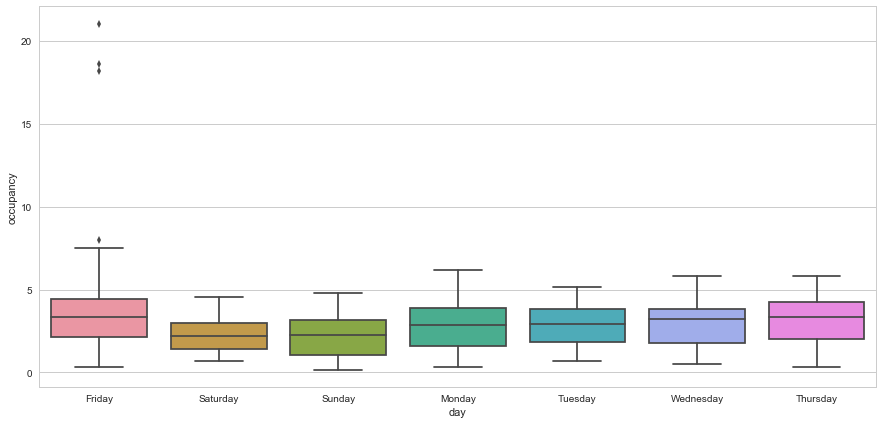

In [121]:
fig, ax_6=plt.subplots(figsize=(15,7))
ax_6 = sns.boxplot(x="day", y="occupancy", data=df)
plt.show()

## Violin Plot

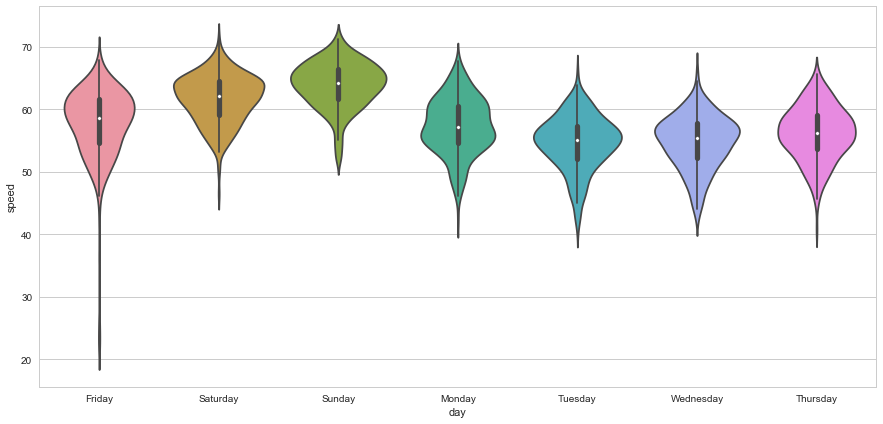

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax_7=plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
#ax2 = sns.violinplot(x=tips["total_bill"])

ax_7 = sns.violinplot(x="day", y="speed", data=df)
plt.show()

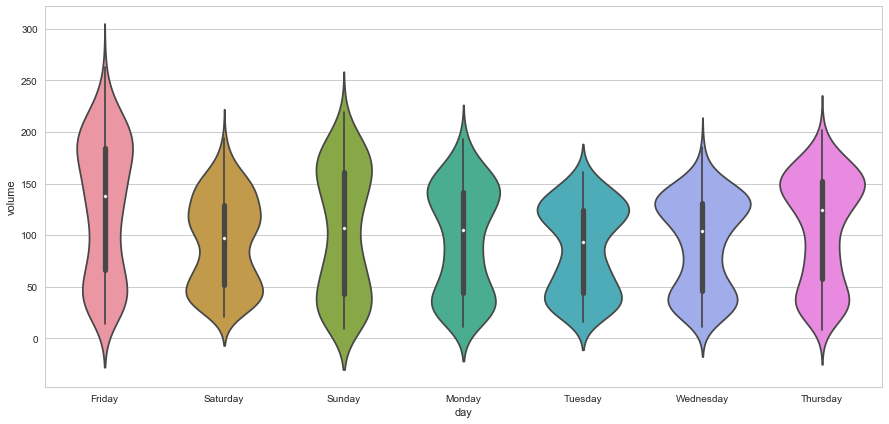

In [123]:
fig, ax_8=plt.subplots(figsize=(15,7))

ax_8 = sns.violinplot(x="day", y="volume", data=df)
plt.show()

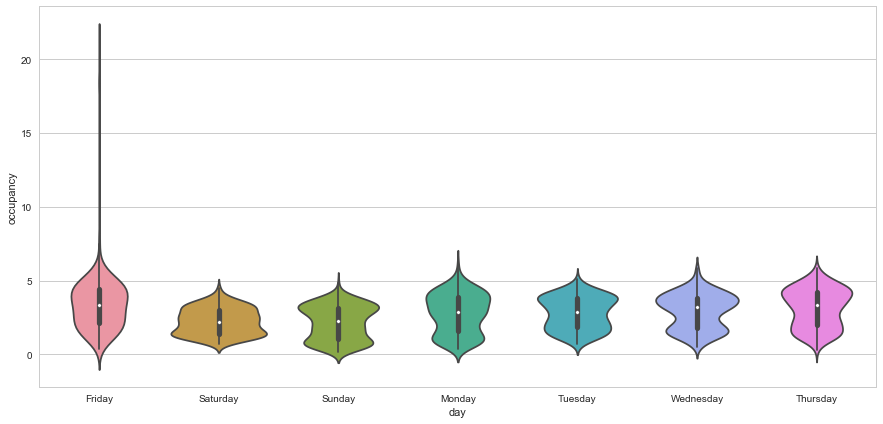

In [124]:
fig, ax_9=plt.subplots(figsize=(15,7))

ax_9 = sns.violinplot(x="day", y="occupancy", data=df)
plt.show()

## Q-Q plot

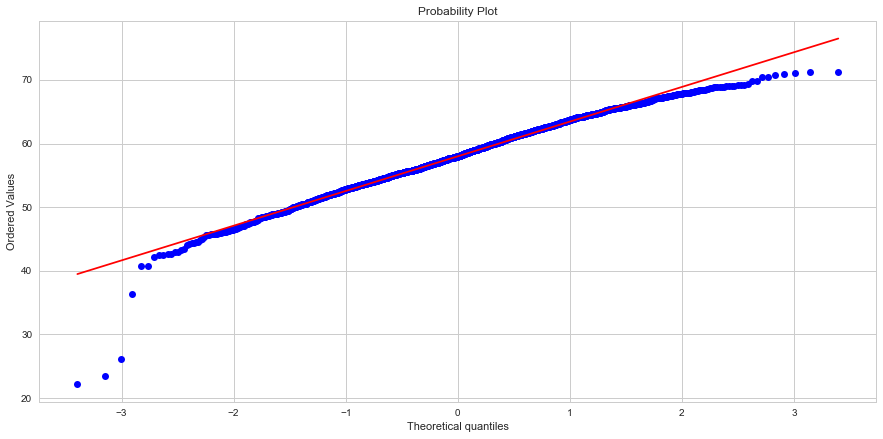

In [125]:
import numpy as np 
import pylab 
import scipy.stats as stats

fig, ax_10=plt.subplots(figsize=(15,7))
#df1=df[(df['measurement_start']>='2017-11-03 00:00:00' ) & (df['measurement_start']<'2017-11-04 00:00:00')] #one day data

stats.probplot(df['speed'], dist="norm", plot=pylab)

pylab.show()

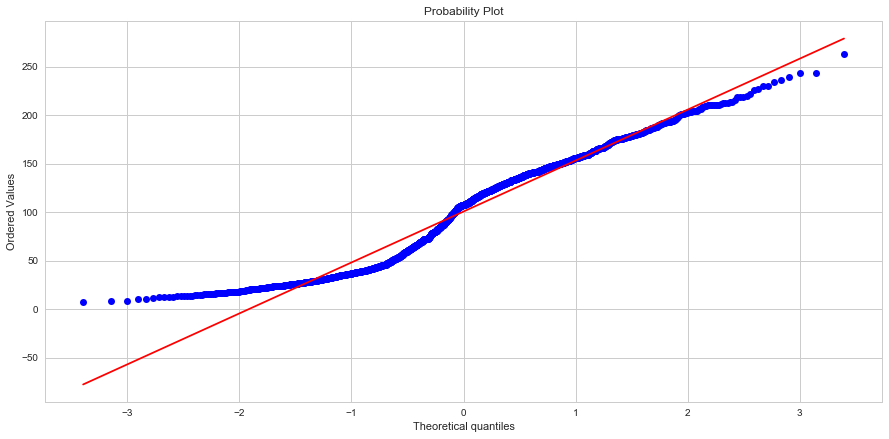

In [126]:
fig, ax_11=plt.subplots(figsize=(15,7))

stats.probplot(df['volume'], dist="norm", plot=pylab)

pylab.show()

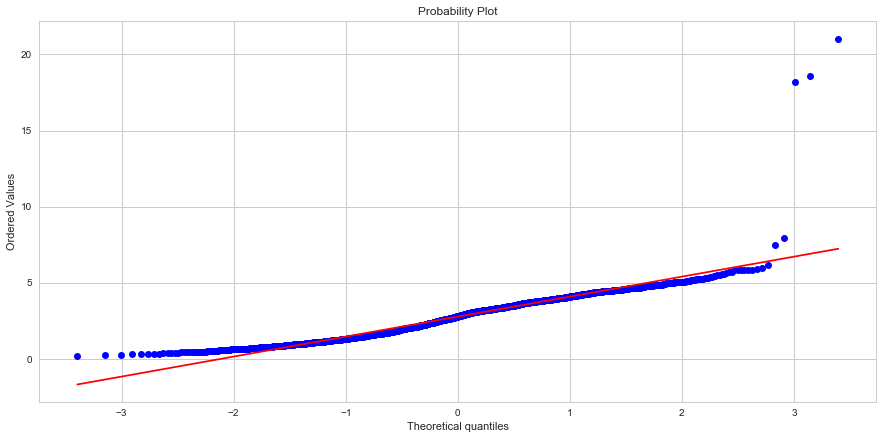

In [127]:
fig, ax_12=plt.subplots(figsize=(15,7))

stats.probplot(df['occupancy'], dist="norm", plot=pylab)

pylab.show()